In [1]:
import cv2
import matplotlib.pyplot as plt

from yunet_gpu import YuNet

/Users/work_uni/miniforge3/envs/deepface-env/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/work_uni/miniforge3/envs/deepface-env/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /Users/work_uni/miniforge3/envs/deepface-env/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/Users/work_uni/miniforge3/envs/deepface-env/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/work_uni/miniforge3/envs/deepface-env/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/work_uni/miniforge3/envs/deepface-env/lib/python3.10/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/work_uni/miniforge3/envs/deepface-env/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvis

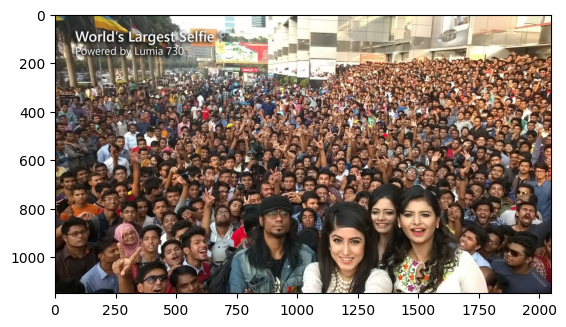

In [2]:
image = cv2.imread("word_largest_selfie.jpg")
plt.imshow(image[..., ::-1])

In [ ]:
model_path = "face_detection_yunet_2023mar.onnx"

# providers for arm based macs
providers = [
        ("CoreMLExecutionProvider", {
            "ModelFormat": "MLProgram",
            "MLComputeUnits": "ALL",
            "RequireStaticInputShapes": "0",
            "EnableOnSubgraphs": "0",
        })
]

model = YuNet(model_path, providers)

In [4]:
results = model.detect(image)

In [5]:
for face in results:
    x, y, w, h = face[0:4]
    x2 = int(x+w)
    y2 = int(y+h)
    cv2.rectangle(image, (int(x), int(y)), (x2, y2), (0, 255, 0), 2)

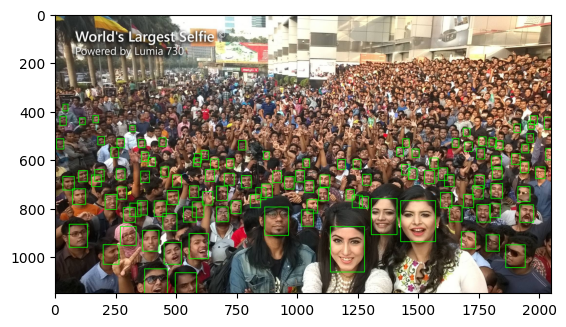

In [6]:
plt.imshow(image[..., ::-1])